In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import load
from data_preprocess import preprocess_data

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

In [2]:
log_reg_model = load('C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/logistic_regression_model.pkl')
dt_model = load('C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/decision_tree_model.pkl')

<font color="bluegrey" size=+1.0><b>Preprocess</b></font>

In [3]:
file_path = 'C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

data = data.drop(columns=['id'])

target_column = 'stroke'

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

X_train_processed, X_test_processed, pipeline = preprocess_data(X_train, X_test, categorical_columns, numerical_columns)

Processed Training Data Shape: (4088, 18)
Processed Testing Data Shape: (1022, 18)


<font color="bluegrey" size=+1.0><b>Logistic Regression</b></font>

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  0%|          | 0/1022 [00:00<?, ?it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  0%|          | 1/1022 [00:00<08:02,  2.12it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature nam

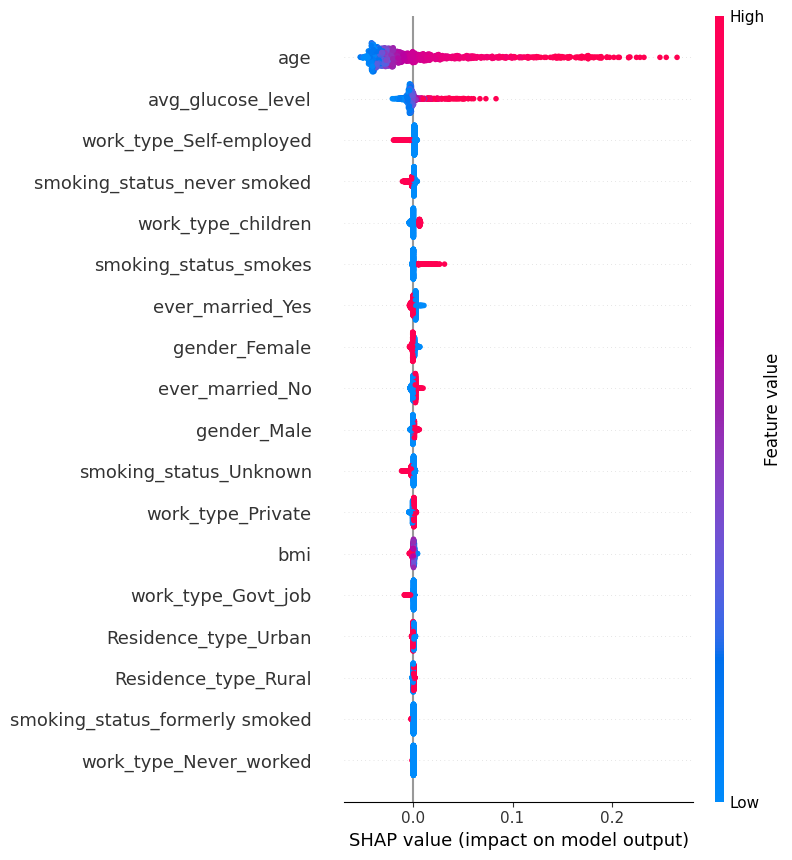

In [5]:
def predict_fn(X):
    return log_reg_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_log = shap.KernelExplainer(predict_fn, background_kmeans)
shap_values_log = explainer_log.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names

shap.summary_plot(shap_values_log, X_test_processed, feature_names=feature_names)

<font color="bluegrey" size=+1.0><b>Decision Tree</b></font>

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
  0%|          | 0/1022 [00:00<?, ?it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
  0%|          | 1/1022 [00:00<06:52,  2.47it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted 

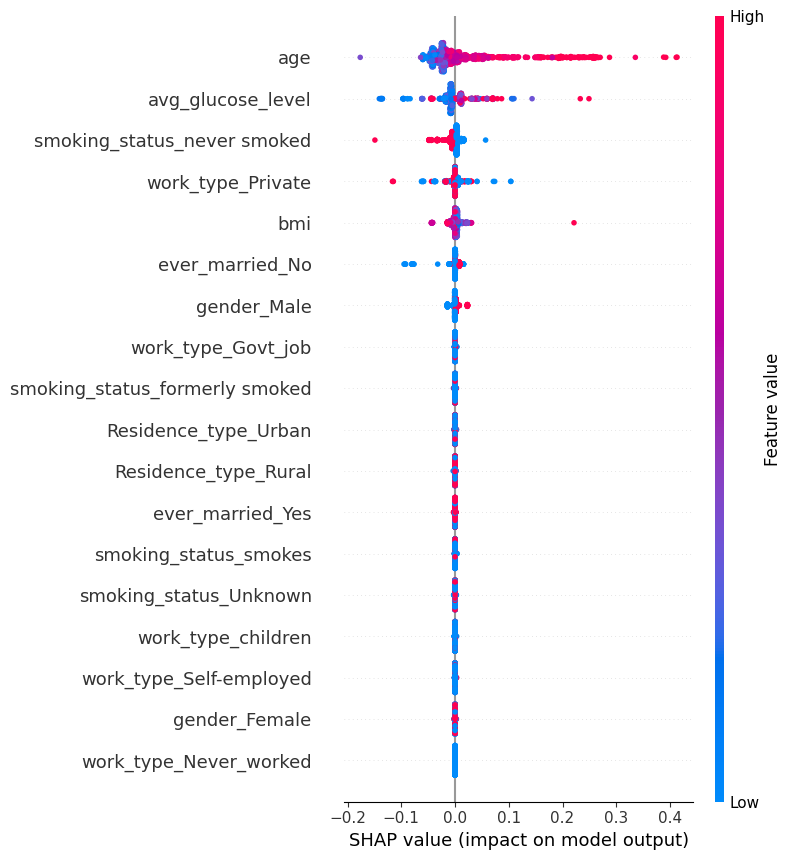

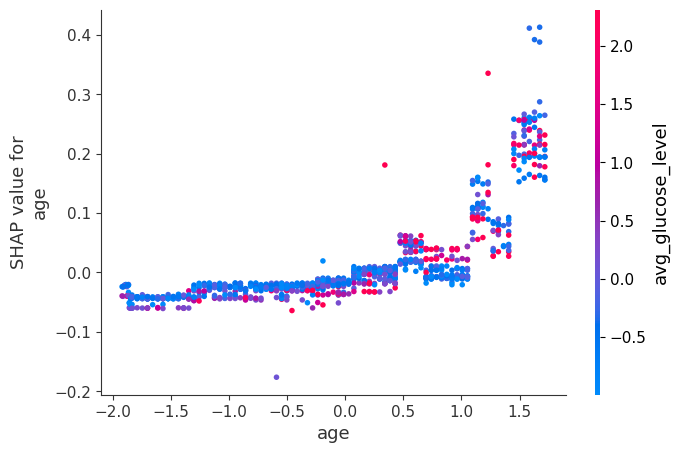

In [22]:
def predict_fn_dt(X):
    return dt_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_dt = shap.KernelExplainer(predict_fn_dt, background_kmeans)

shap_values_dt = explainer_dt.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_dt, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_dt, X_test_processed, feature_names=feature_names)

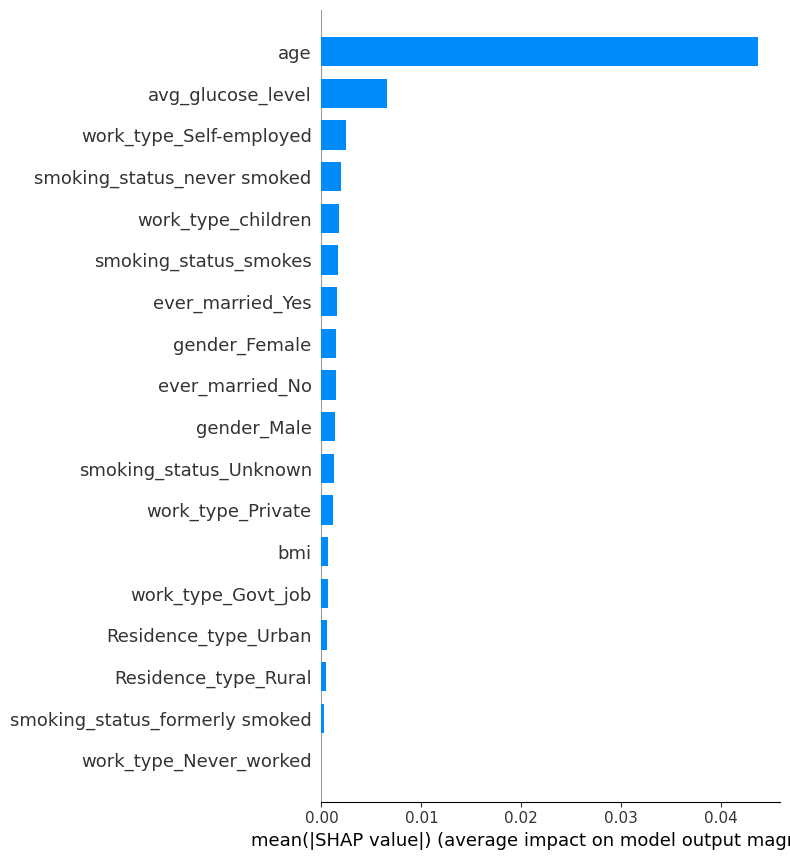

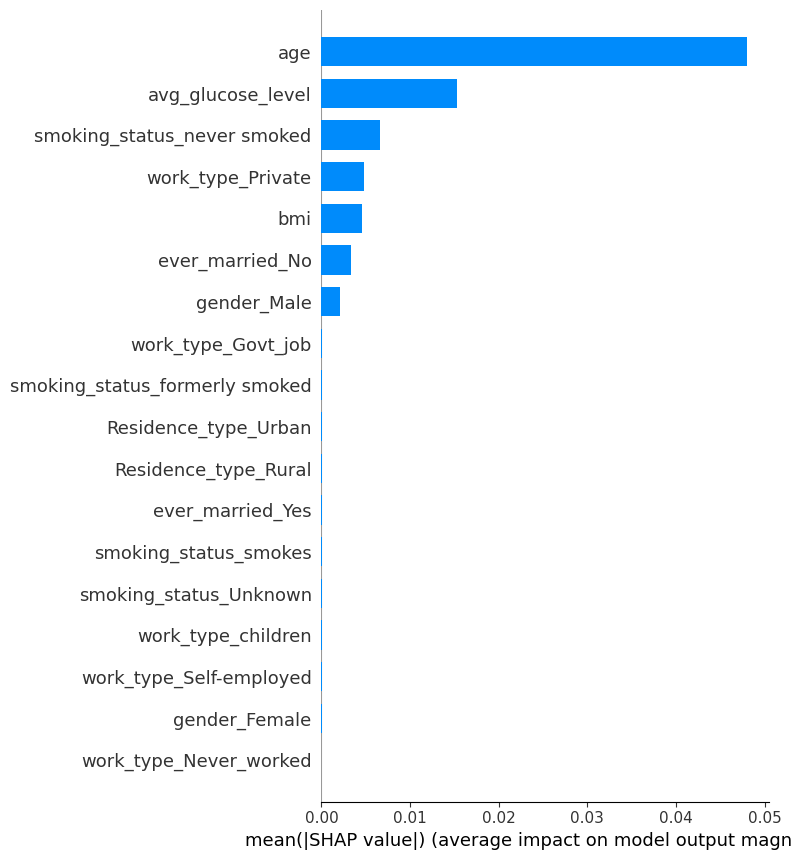

In [24]:
# Feature importance for Logistic Regression
shap.summary_plot(shap_values_log, X_test_processed, feature_names=feature_names, plot_type="bar")

# Feature importance for Decision Tree
shap.summary_plot(shap_values_dt, X_test_processed, feature_names=feature_names, plot_type="bar")